<a href="https://colab.research.google.com/github/chrishg23-jpg/HES-benchmark/blob/main/RegulatorEvo001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

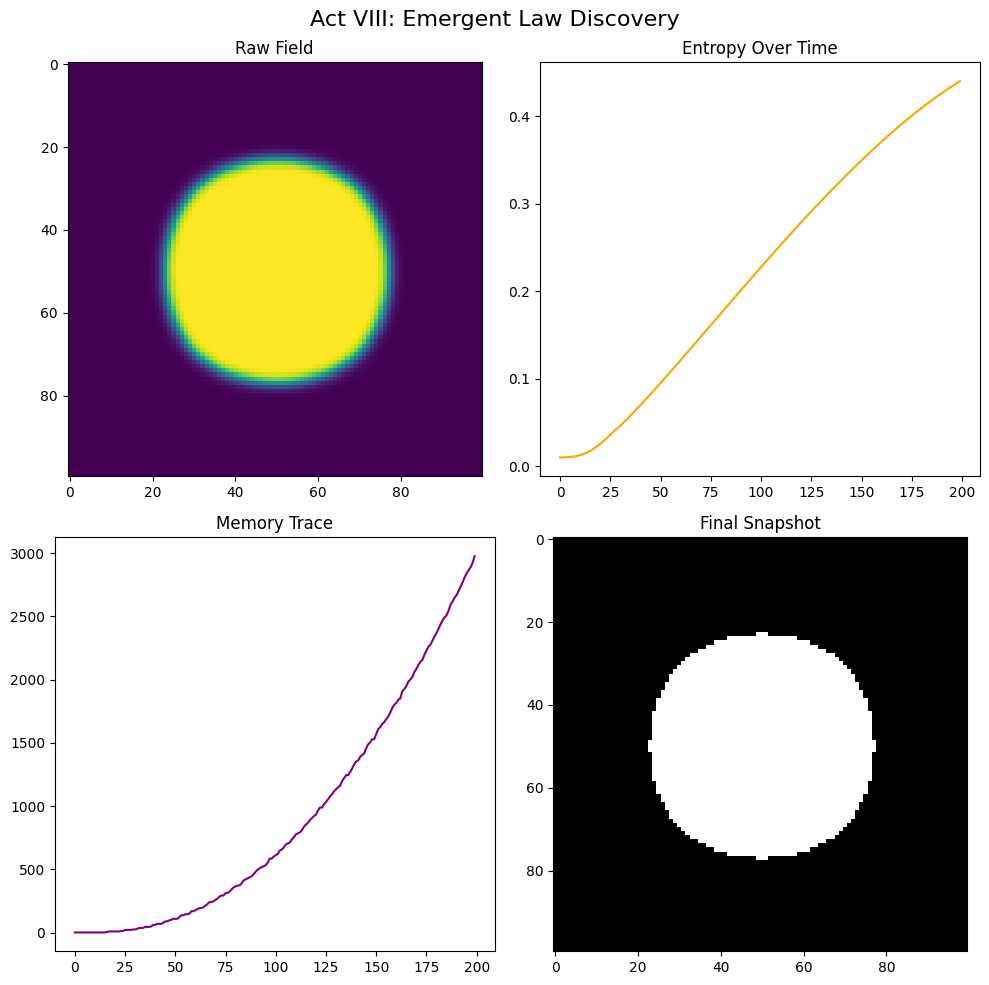

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# --- Parameters ---
GRID_SIZE = 100
TIME_STEPS = 200
SEED_LOCATION = (50, 50)
SEED_VALUE = 1.0

# --- Initialize Field ---
field = np.zeros((GRID_SIZE, GRID_SIZE))
field[SEED_LOCATION] = SEED_VALUE

# --- Regulator (Passive Observer) ---
def regulator(field, t):
    # No intervention—only logs entropy and memory trace
    entropy = np.std(field)
    memory_trace = np.sum(field > 0.5)
    return entropy, memory_trace

# --- Evolution Rule (Minimal Constraint) ---
def evolve(field):
    new_field = field.copy()
    for i in range(1, GRID_SIZE - 1):
        for j in range(1, GRID_SIZE - 1):
            # Simple diffusion with local feedback
            local_avg = np.mean(field[i-1:i+2, j-1:j+2])
            feedback = np.sin(local_avg * np.pi) * 0.05
            new_field[i, j] += feedback
    return np.clip(new_field, 0, 1)

# --- Run Simulation ---
entropy_log = []
memory_log = []
frames = []

for t in range(TIME_STEPS):
    field = evolve(field)
    entropy, memory = regulator(field, t)
    entropy_log.append(entropy)
    memory_log.append(memory)
    if t % 20 == 0:
        frames.append(field.copy())

# --- Visualization ---
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
titles = ["Raw Field", "Entropy Over Time", "Memory Trace", "Final Snapshot"]

# Panel 1: Raw Field
axs[0, 0].imshow(frames[-1], cmap='viridis')
axs[0, 0].set_title(titles[0])

# Panel 2: Entropy
axs[0, 1].plot(entropy_log, color='orange')
axs[0, 1].set_title(titles[1])

# Panel 3: Memory Trace
axs[1, 0].plot(memory_log, color='purple')
axs[1, 0].set_title(titles[2])

# Panel 4: Final Snapshot
axs[1, 1].imshow(frames[-1] > 0.5, cmap='gray')
axs[1, 1].set_title(titles[3])

plt.suptitle("Act VIII: Emergent Law Discovery", fontsize=16)
plt.tight_layout()
plt.show()
